In [1]:
import catboost
import pandas as pd
import numpy as np

### Loading the data

In [84]:
df_x = pd.read_csv('./dfnew_2.csv')

In [85]:
for col in df_x.columns:
    if 'class' not in col:
        df_x.pop(col)
df_x

,class_METABOLISM,class_MOBILOME,class_INFORMATION STORAGE AND PROCESSING,class_CELLULAR PROCESSES AND SIGNALING,class_Unknown
0,1889,13,390,471,847
1,2053,20,567,393,652
2,452,10,249,259,594
3,1479,44,579,2057,1065
4,1890,30,588,651,908
...,...,...,...,...,...
3115,318,231,94,122,306
3116,78,2,113,44,93
3117,10,0,7,5,13
3118,323,13,835,288,459


In [71]:
df_y = pd.read_csv('./cogs.csv')
df_y = df_y.drop(3120)
df_y

,name,class,d
0,COG0001,0,11
1,COG0002,0,2
2,COG0003,0,21
3,COG0004,0,21
4,COG0005,0,16
...,...,...,...
3115,COG5659,1,14
3116,COG5660,3,15
3117,COG5661,3,19
3118,COG5662,2,3


In [72]:
y_class = df_y['class']

In [73]:
y = y_class

,class_METABOLISM,class_MOBILOME,class_INFORMATION STORAGE AND PROCESSING,class_CELLULAR PROCESSES AND SIGNALING,class_Unknown
0,1101,10,243,265,491
1,1164,10,301,246,408
2,211,4,94,126,420
3,687,28,292,1407,518
4,1186,16,319,325,467
...,...,...,...,...,...
3115,185,150,58,62,182
3116,34,2,92,10,41
3117,8,0,3,3,9
3118,109,5,674,129,104


### Creating the model

In [104]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
mod = catboost.CatBoostClassifier(
        iterations=1300,
        learning_rate = 0.01,
        depth=6,
        l2_leaf_reg = 3,verbose=True)

0:	learn: 1.3786618	total: 2.67ms	remaining: 3.47s
1:	learn: 1.3708695	total: 5.42ms	remaining: 3.52s
2:	learn: 1.3638806	total: 8.07ms	remaining: 3.49s
3:	learn: 1.3553670	total: 10.9ms	remaining: 3.54s
4:	learn: 1.3478891	total: 14ms	remaining: 3.64s
5:	learn: 1.3409622	total: 16.8ms	remaining: 3.62s
6:	learn: 1.3335146	total: 20.1ms	remaining: 3.72s
7:	learn: 1.3269232	total: 22.6ms	remaining: 3.65s
8:	learn: 1.3194196	total: 24.9ms	remaining: 3.57s
9:	learn: 1.3122406	total: 27.7ms	remaining: 3.57s
10:	learn: 1.3057109	total: 30.4ms	remaining: 3.57s
11:	learn: 1.2990353	total: 35.4ms	remaining: 3.8s
12:	learn: 1.2921711	total: 38.6ms	remaining: 3.82s
13:	learn: 1.2858905	total: 41ms	remaining: 3.76s
14:	learn: 1.2790542	total: 43.8ms	remaining: 3.75s
15:	learn: 1.2731090	total: 46.2ms	remaining: 3.71s
16:	learn: 1.2670261	total: 48.5ms	remaining: 3.66s
17:	learn: 1.2608126	total: 51.1ms	remaining: 3.64s
18:	learn: 1.2554992	total: 53.9ms	remaining: 3.64s
19:	learn: 1.2499591	total:

179:	learn: 0.8618304	total: 581ms	remaining: 3.61s
180:	learn: 0.8608564	total: 585ms	remaining: 3.61s
181:	learn: 0.8599209	total: 588ms	remaining: 3.61s
182:	learn: 0.8589588	total: 592ms	remaining: 3.61s
183:	learn: 0.8581466	total: 595ms	remaining: 3.61s
184:	learn: 0.8570661	total: 599ms	remaining: 3.61s
185:	learn: 0.8559758	total: 603ms	remaining: 3.61s
186:	learn: 0.8549885	total: 607ms	remaining: 3.61s
187:	learn: 0.8540191	total: 610ms	remaining: 3.61s
188:	learn: 0.8530674	total: 614ms	remaining: 3.61s
189:	learn: 0.8520564	total: 618ms	remaining: 3.61s
190:	learn: 0.8512068	total: 622ms	remaining: 3.61s
191:	learn: 0.8502043	total: 626ms	remaining: 3.61s
192:	learn: 0.8492989	total: 629ms	remaining: 3.61s
193:	learn: 0.8483851	total: 634ms	remaining: 3.62s
194:	learn: 0.8475628	total: 639ms	remaining: 3.62s
195:	learn: 0.8466800	total: 643ms	remaining: 3.62s
196:	learn: 0.8456514	total: 647ms	remaining: 3.62s
197:	learn: 0.8448994	total: 651ms	remaining: 3.62s
198:	learn: 

387:	learn: 0.7509412	total: 1.36s	remaining: 3.19s
388:	learn: 0.7506521	total: 1.36s	remaining: 3.19s
389:	learn: 0.7504173	total: 1.36s	remaining: 3.19s
390:	learn: 0.7501867	total: 1.37s	remaining: 3.18s
391:	learn: 0.7500168	total: 1.37s	remaining: 3.18s
392:	learn: 0.7497230	total: 1.38s	remaining: 3.18s
393:	learn: 0.7494262	total: 1.38s	remaining: 3.17s
394:	learn: 0.7490701	total: 1.39s	remaining: 3.17s
395:	learn: 0.7487851	total: 1.39s	remaining: 3.17s
396:	learn: 0.7484938	total: 1.39s	remaining: 3.17s
397:	learn: 0.7482849	total: 1.4s	remaining: 3.17s
398:	learn: 0.7480099	total: 1.4s	remaining: 3.16s
399:	learn: 0.7477604	total: 1.4s	remaining: 3.16s
400:	learn: 0.7475096	total: 1.41s	remaining: 3.16s
401:	learn: 0.7472165	total: 1.41s	remaining: 3.15s
402:	learn: 0.7469284	total: 1.42s	remaining: 3.15s
403:	learn: 0.7467062	total: 1.42s	remaining: 3.15s
404:	learn: 0.7464606	total: 1.42s	remaining: 3.14s
405:	learn: 0.7462163	total: 1.43s	remaining: 3.14s
406:	learn: 0.7

601:	learn: 0.7063568	total: 2.14s	remaining: 2.48s
602:	learn: 0.7060821	total: 2.14s	remaining: 2.47s
603:	learn: 0.7059306	total: 2.14s	remaining: 2.47s
604:	learn: 0.7058109	total: 2.15s	remaining: 2.47s
605:	learn: 0.7055523	total: 2.15s	remaining: 2.46s
606:	learn: 0.7054170	total: 2.15s	remaining: 2.46s
607:	learn: 0.7052932	total: 2.16s	remaining: 2.46s
608:	learn: 0.7051530	total: 2.16s	remaining: 2.45s
609:	learn: 0.7050061	total: 2.17s	remaining: 2.45s
610:	learn: 0.7049023	total: 2.17s	remaining: 2.45s
611:	learn: 0.7047719	total: 2.17s	remaining: 2.44s
612:	learn: 0.7046521	total: 2.18s	remaining: 2.44s
613:	learn: 0.7045341	total: 2.18s	remaining: 2.44s
614:	learn: 0.7043391	total: 2.18s	remaining: 2.43s
615:	learn: 0.7041333	total: 2.19s	remaining: 2.43s
616:	learn: 0.7039579	total: 2.19s	remaining: 2.42s
617:	learn: 0.7038489	total: 2.19s	remaining: 2.42s
618:	learn: 0.7037186	total: 2.2s	remaining: 2.42s
619:	learn: 0.7035629	total: 2.2s	remaining: 2.42s
620:	learn: 0.

768:	learn: 0.6846870	total: 2.72s	remaining: 1.88s
769:	learn: 0.6845909	total: 2.73s	remaining: 1.88s
770:	learn: 0.6844085	total: 2.73s	remaining: 1.87s
771:	learn: 0.6842474	total: 2.73s	remaining: 1.87s
772:	learn: 0.6840828	total: 2.74s	remaining: 1.86s
773:	learn: 0.6839697	total: 2.74s	remaining: 1.86s
774:	learn: 0.6838409	total: 2.74s	remaining: 1.86s
775:	learn: 0.6836786	total: 2.75s	remaining: 1.85s
776:	learn: 0.6835540	total: 2.75s	remaining: 1.85s
777:	learn: 0.6833986	total: 2.75s	remaining: 1.85s
778:	learn: 0.6832807	total: 2.76s	remaining: 1.84s
779:	learn: 0.6831435	total: 2.76s	remaining: 1.84s
780:	learn: 0.6830473	total: 2.76s	remaining: 1.84s
781:	learn: 0.6829511	total: 2.77s	remaining: 1.83s
782:	learn: 0.6828753	total: 2.77s	remaining: 1.83s
783:	learn: 0.6828066	total: 2.77s	remaining: 1.83s
784:	learn: 0.6826997	total: 2.78s	remaining: 1.82s
785:	learn: 0.6825820	total: 2.78s	remaining: 1.82s
786:	learn: 0.6824844	total: 2.78s	remaining: 1.81s
787:	learn: 

937:	learn: 0.6651894	total: 3.31s	remaining: 1.27s
938:	learn: 0.6651399	total: 3.31s	remaining: 1.27s
939:	learn: 0.6649671	total: 3.31s	remaining: 1.27s
940:	learn: 0.6648937	total: 3.32s	remaining: 1.26s
941:	learn: 0.6647318	total: 3.32s	remaining: 1.26s
942:	learn: 0.6646382	total: 3.32s	remaining: 1.26s
943:	learn: 0.6645216	total: 3.33s	remaining: 1.25s
944:	learn: 0.6644650	total: 3.33s	remaining: 1.25s
945:	learn: 0.6643329	total: 3.33s	remaining: 1.25s
946:	learn: 0.6642041	total: 3.34s	remaining: 1.24s
947:	learn: 0.6640688	total: 3.34s	remaining: 1.24s
948:	learn: 0.6639346	total: 3.34s	remaining: 1.24s
949:	learn: 0.6638503	total: 3.35s	remaining: 1.23s
950:	learn: 0.6637762	total: 3.35s	remaining: 1.23s
951:	learn: 0.6636175	total: 3.35s	remaining: 1.23s
952:	learn: 0.6635292	total: 3.36s	remaining: 1.22s
953:	learn: 0.6633689	total: 3.36s	remaining: 1.22s
954:	learn: 0.6632890	total: 3.36s	remaining: 1.22s
955:	learn: 0.6632302	total: 3.37s	remaining: 1.21s
956:	learn: 

1110:	learn: 0.6480839	total: 3.89s	remaining: 661ms
1111:	learn: 0.6480291	total: 3.89s	remaining: 658ms
1112:	learn: 0.6479563	total: 3.89s	remaining: 654ms
1113:	learn: 0.6478041	total: 3.9s	remaining: 651ms
1114:	learn: 0.6477181	total: 3.9s	remaining: 647ms
1115:	learn: 0.6476553	total: 3.9s	remaining: 644ms
1116:	learn: 0.6475288	total: 3.91s	remaining: 640ms
1117:	learn: 0.6474693	total: 3.91s	remaining: 637ms
1118:	learn: 0.6474213	total: 3.92s	remaining: 633ms
1119:	learn: 0.6473468	total: 3.92s	remaining: 630ms
1120:	learn: 0.6472225	total: 3.92s	remaining: 626ms
1121:	learn: 0.6471196	total: 3.92s	remaining: 623ms
1122:	learn: 0.6470463	total: 3.93s	remaining: 619ms
1123:	learn: 0.6469818	total: 3.93s	remaining: 616ms
1124:	learn: 0.6469034	total: 3.93s	remaining: 612ms
1125:	learn: 0.6467797	total: 3.94s	remaining: 608ms
1126:	learn: 0.6467143	total: 3.94s	remaining: 605ms
1127:	learn: 0.6465865	total: 3.94s	remaining: 601ms
1128:	learn: 0.6465349	total: 3.94s	remaining: 59

1286:	learn: 0.6322967	total: 4.47s	remaining: 45.2ms
1287:	learn: 0.6321843	total: 4.48s	remaining: 41.7ms
1288:	learn: 0.6320696	total: 4.48s	remaining: 38.2ms
1289:	learn: 0.6319988	total: 4.48s	remaining: 34.8ms
1290:	learn: 0.6318673	total: 4.49s	remaining: 31.3ms
1291:	learn: 0.6318026	total: 4.49s	remaining: 27.8ms
1292:	learn: 0.6316774	total: 4.5s	remaining: 24.3ms
1293:	learn: 0.6315889	total: 4.5s	remaining: 20.9ms
1294:	learn: 0.6314835	total: 4.5s	remaining: 17.4ms
1295:	learn: 0.6314176	total: 4.5s	remaining: 13.9ms
1296:	learn: 0.6313308	total: 4.51s	remaining: 10.4ms
1297:	learn: 0.6312132	total: 4.51s	remaining: 6.95ms
1298:	learn: 0.6311467	total: 4.51s	remaining: 3.48ms
1299:	learn: 0.6310153	total: 4.52s	remaining: 0us
0:	learn: 1.3779882	total: 2.89ms	remaining: 3.76s
1:	learn: 1.3695839	total: 5.88ms	remaining: 3.82s
2:	learn: 1.3619576	total: 9.19ms	remaining: 3.97s
3:	learn: 1.3538498	total: 12.6ms	remaining: 4.09s
4:	learn: 1.3470050	total: 15.5ms	remaining: 4.

195:	learn: 0.8284552	total: 656ms	remaining: 3.7s
196:	learn: 0.8276944	total: 661ms	remaining: 3.7s
197:	learn: 0.8267941	total: 665ms	remaining: 3.7s
198:	learn: 0.8259194	total: 669ms	remaining: 3.7s
199:	learn: 0.8250473	total: 673ms	remaining: 3.7s
200:	learn: 0.8241224	total: 676ms	remaining: 3.7s
201:	learn: 0.8232863	total: 681ms	remaining: 3.7s
202:	learn: 0.8223037	total: 685ms	remaining: 3.7s
203:	learn: 0.8213549	total: 689ms	remaining: 3.7s
204:	learn: 0.8203826	total: 692ms	remaining: 3.7s
205:	learn: 0.8194771	total: 697ms	remaining: 3.7s
206:	learn: 0.8185894	total: 700ms	remaining: 3.7s
207:	learn: 0.8177017	total: 704ms	remaining: 3.69s
208:	learn: 0.8166644	total: 707ms	remaining: 3.69s
209:	learn: 0.8157186	total: 710ms	remaining: 3.69s
210:	learn: 0.8148944	total: 714ms	remaining: 3.68s
211:	learn: 0.8139101	total: 717ms	remaining: 3.68s
212:	learn: 0.8130697	total: 720ms	remaining: 3.68s
213:	learn: 0.8121285	total: 724ms	remaining: 3.67s
214:	learn: 0.8113495	to

366:	learn: 0.7319854	total: 1.23s	remaining: 3.13s
367:	learn: 0.7316206	total: 1.24s	remaining: 3.13s
368:	learn: 0.7312737	total: 1.24s	remaining: 3.13s
369:	learn: 0.7308069	total: 1.24s	remaining: 3.13s
370:	learn: 0.7304319	total: 1.25s	remaining: 3.13s
371:	learn: 0.7300528	total: 1.25s	remaining: 3.12s
372:	learn: 0.7297008	total: 1.25s	remaining: 3.12s
373:	learn: 0.7293313	total: 1.26s	remaining: 3.12s
374:	learn: 0.7290500	total: 1.26s	remaining: 3.11s
375:	learn: 0.7287929	total: 1.26s	remaining: 3.11s
376:	learn: 0.7285012	total: 1.27s	remaining: 3.1s
377:	learn: 0.7281459	total: 1.27s	remaining: 3.1s
378:	learn: 0.7278025	total: 1.27s	remaining: 3.1s
379:	learn: 0.7275346	total: 1.28s	remaining: 3.09s
380:	learn: 0.7272826	total: 1.28s	remaining: 3.09s
381:	learn: 0.7269967	total: 1.28s	remaining: 3.09s
382:	learn: 0.7266833	total: 1.29s	remaining: 3.08s
383:	learn: 0.7264330	total: 1.29s	remaining: 3.08s
384:	learn: 0.7260895	total: 1.29s	remaining: 3.08s
385:	learn: 0.7

538:	learn: 0.6889795	total: 1.82s	remaining: 2.57s
539:	learn: 0.6887461	total: 1.82s	remaining: 2.57s
540:	learn: 0.6886095	total: 1.83s	remaining: 2.56s
541:	learn: 0.6884705	total: 1.83s	remaining: 2.56s
542:	learn: 0.6882404	total: 1.83s	remaining: 2.56s
543:	learn: 0.6880472	total: 1.84s	remaining: 2.55s
544:	learn: 0.6878330	total: 1.84s	remaining: 2.55s
545:	learn: 0.6876376	total: 1.84s	remaining: 2.55s
546:	learn: 0.6874133	total: 1.85s	remaining: 2.54s
547:	learn: 0.6872479	total: 1.85s	remaining: 2.54s
548:	learn: 0.6871292	total: 1.86s	remaining: 2.54s
549:	learn: 0.6868908	total: 1.86s	remaining: 2.54s
550:	learn: 0.6866780	total: 1.86s	remaining: 2.53s
551:	learn: 0.6864664	total: 1.87s	remaining: 2.53s
552:	learn: 0.6863673	total: 1.87s	remaining: 2.53s
553:	learn: 0.6862344	total: 1.87s	remaining: 2.52s
554:	learn: 0.6860482	total: 1.88s	remaining: 2.52s
555:	learn: 0.6858104	total: 1.88s	remaining: 2.52s
556:	learn: 0.6855924	total: 1.89s	remaining: 2.52s
557:	learn: 

747:	learn: 0.6566140	total: 2.6s	remaining: 1.92s
748:	learn: 0.6564415	total: 2.6s	remaining: 1.92s
749:	learn: 0.6563099	total: 2.61s	remaining: 1.91s
750:	learn: 0.6561128	total: 2.61s	remaining: 1.91s
751:	learn: 0.6560290	total: 2.62s	remaining: 1.91s
752:	learn: 0.6559399	total: 2.62s	remaining: 1.9s
753:	learn: 0.6557451	total: 2.62s	remaining: 1.9s
754:	learn: 0.6555802	total: 2.63s	remaining: 1.9s
755:	learn: 0.6553699	total: 2.63s	remaining: 1.89s
756:	learn: 0.6553045	total: 2.63s	remaining: 1.89s
757:	learn: 0.6551620	total: 2.64s	remaining: 1.89s
758:	learn: 0.6550447	total: 2.64s	remaining: 1.88s
759:	learn: 0.6549338	total: 2.64s	remaining: 1.88s
760:	learn: 0.6547685	total: 2.65s	remaining: 1.88s
761:	learn: 0.6546448	total: 2.65s	remaining: 1.87s
762:	learn: 0.6544592	total: 2.65s	remaining: 1.87s
763:	learn: 0.6542986	total: 2.66s	remaining: 1.86s
764:	learn: 0.6541736	total: 2.66s	remaining: 1.86s
765:	learn: 0.6540333	total: 2.66s	remaining: 1.86s
766:	learn: 0.653

919:	learn: 0.6354543	total: 3.18s	remaining: 1.31s
920:	learn: 0.6352761	total: 3.19s	remaining: 1.31s
921:	learn: 0.6351340	total: 3.19s	remaining: 1.31s
922:	learn: 0.6350489	total: 3.19s	remaining: 1.3s
923:	learn: 0.6349558	total: 3.2s	remaining: 1.3s
924:	learn: 0.6348681	total: 3.2s	remaining: 1.3s
925:	learn: 0.6347327	total: 3.2s	remaining: 1.29s
926:	learn: 0.6346611	total: 3.21s	remaining: 1.29s
927:	learn: 0.6345546	total: 3.21s	remaining: 1.29s
928:	learn: 0.6344637	total: 3.21s	remaining: 1.28s
929:	learn: 0.6343646	total: 3.22s	remaining: 1.28s
930:	learn: 0.6341912	total: 3.22s	remaining: 1.28s
931:	learn: 0.6340835	total: 3.22s	remaining: 1.27s
932:	learn: 0.6340162	total: 3.23s	remaining: 1.27s
933:	learn: 0.6339493	total: 3.23s	remaining: 1.26s
934:	learn: 0.6338621	total: 3.23s	remaining: 1.26s
935:	learn: 0.6337619	total: 3.24s	remaining: 1.26s
936:	learn: 0.6336895	total: 3.24s	remaining: 1.25s
937:	learn: 0.6335445	total: 3.25s	remaining: 1.25s
938:	learn: 0.6334

1091:	learn: 0.6178561	total: 3.76s	remaining: 717ms
1092:	learn: 0.6176827	total: 3.77s	remaining: 714ms
1093:	learn: 0.6175579	total: 3.77s	remaining: 710ms
1094:	learn: 0.6174129	total: 3.78s	remaining: 707ms
1095:	learn: 0.6173087	total: 3.78s	remaining: 704ms
1096:	learn: 0.6171849	total: 3.78s	remaining: 700ms
1097:	learn: 0.6170160	total: 3.79s	remaining: 697ms
1098:	learn: 0.6169030	total: 3.79s	remaining: 693ms
1099:	learn: 0.6167667	total: 3.79s	remaining: 690ms
1100:	learn: 0.6167114	total: 3.8s	remaining: 686ms
1101:	learn: 0.6166381	total: 3.8s	remaining: 683ms
1102:	learn: 0.6165532	total: 3.8s	remaining: 679ms
1103:	learn: 0.6164667	total: 3.81s	remaining: 676ms
1104:	learn: 0.6163845	total: 3.81s	remaining: 672ms
1105:	learn: 0.6162502	total: 3.81s	remaining: 669ms
1106:	learn: 0.6161931	total: 3.82s	remaining: 665ms
1107:	learn: 0.6161002	total: 3.82s	remaining: 662ms
1108:	learn: 0.6159552	total: 3.82s	remaining: 659ms
1109:	learn: 0.6158539	total: 3.83s	remaining: 65

1260:	learn: 0.6018760	total: 4.34s	remaining: 134ms
1261:	learn: 0.6017855	total: 4.35s	remaining: 131ms
1262:	learn: 0.6016868	total: 4.35s	remaining: 127ms
1263:	learn: 0.6016321	total: 4.35s	remaining: 124ms
1264:	learn: 0.6014631	total: 4.36s	remaining: 121ms
1265:	learn: 0.6013561	total: 4.36s	remaining: 117ms
1266:	learn: 0.6012834	total: 4.36s	remaining: 114ms
1267:	learn: 0.6012053	total: 4.37s	remaining: 110ms
1268:	learn: 0.6011562	total: 4.37s	remaining: 107ms
1269:	learn: 0.6010701	total: 4.37s	remaining: 103ms
1270:	learn: 0.6009757	total: 4.38s	remaining: 99.9ms
1271:	learn: 0.6008859	total: 4.38s	remaining: 96.4ms
1272:	learn: 0.6007505	total: 4.38s	remaining: 93ms
1273:	learn: 0.6006864	total: 4.39s	remaining: 89.5ms
1274:	learn: 0.6006120	total: 4.39s	remaining: 86.1ms
1275:	learn: 0.6005256	total: 4.39s	remaining: 82.6ms
1276:	learn: 0.6004648	total: 4.4s	remaining: 79.2ms
1277:	learn: 0.6003806	total: 4.4s	remaining: 75.7ms
1278:	learn: 0.6002621	total: 4.4s	remaini

124:	learn: 0.9107679	total: 412ms	remaining: 3.88s
125:	learn: 0.9088624	total: 416ms	remaining: 3.88s
126:	learn: 0.9073468	total: 419ms	remaining: 3.87s
127:	learn: 0.9057461	total: 422ms	remaining: 3.87s
128:	learn: 0.9038808	total: 426ms	remaining: 3.87s
129:	learn: 0.9022376	total: 429ms	remaining: 3.86s
130:	learn: 0.9008266	total: 433ms	remaining: 3.86s
131:	learn: 0.8990951	total: 436ms	remaining: 3.86s
132:	learn: 0.8979825	total: 439ms	remaining: 3.85s
133:	learn: 0.8963161	total: 442ms	remaining: 3.85s
134:	learn: 0.8947649	total: 446ms	remaining: 3.85s
135:	learn: 0.8934314	total: 449ms	remaining: 3.85s
136:	learn: 0.8918157	total: 453ms	remaining: 3.84s
137:	learn: 0.8903078	total: 456ms	remaining: 3.84s
138:	learn: 0.8886671	total: 459ms	remaining: 3.83s
139:	learn: 0.8871004	total: 462ms	remaining: 3.83s
140:	learn: 0.8856136	total: 465ms	remaining: 3.82s
141:	learn: 0.8841571	total: 468ms	remaining: 3.82s
142:	learn: 0.8826280	total: 471ms	remaining: 3.81s
143:	learn: 

300:	learn: 0.7544686	total: 996ms	remaining: 3.31s
301:	learn: 0.7539533	total: 1000ms	remaining: 3.3s
302:	learn: 0.7535070	total: 1s	remaining: 3.3s
303:	learn: 0.7529996	total: 1s	remaining: 3.29s
304:	learn: 0.7524544	total: 1.01s	remaining: 3.29s
305:	learn: 0.7519564	total: 1.01s	remaining: 3.29s
306:	learn: 0.7516489	total: 1.02s	remaining: 3.29s
307:	learn: 0.7512262	total: 1.02s	remaining: 3.29s
308:	learn: 0.7508355	total: 1.02s	remaining: 3.29s
309:	learn: 0.7503393	total: 1.03s	remaining: 3.29s
310:	learn: 0.7498295	total: 1.03s	remaining: 3.28s
311:	learn: 0.7495030	total: 1.03s	remaining: 3.28s
312:	learn: 0.7490914	total: 1.04s	remaining: 3.27s
313:	learn: 0.7485191	total: 1.04s	remaining: 3.27s
314:	learn: 0.7479522	total: 1.04s	remaining: 3.27s
315:	learn: 0.7476493	total: 1.05s	remaining: 3.26s
316:	learn: 0.7471732	total: 1.05s	remaining: 3.26s
317:	learn: 0.7468578	total: 1.05s	remaining: 3.26s
318:	learn: 0.7464031	total: 1.06s	remaining: 3.25s
319:	learn: 0.74605

472:	learn: 0.6992680	total: 1.58s	remaining: 2.76s
473:	learn: 0.6990377	total: 1.58s	remaining: 2.76s
474:	learn: 0.6988487	total: 1.59s	remaining: 2.75s
475:	learn: 0.6986866	total: 1.59s	remaining: 2.75s
476:	learn: 0.6984481	total: 1.59s	remaining: 2.75s
477:	learn: 0.6982003	total: 1.6s	remaining: 2.75s
478:	learn: 0.6979830	total: 1.6s	remaining: 2.75s
479:	learn: 0.6978675	total: 1.6s	remaining: 2.74s
480:	learn: 0.6977293	total: 1.61s	remaining: 2.74s
481:	learn: 0.6974907	total: 1.61s	remaining: 2.73s
482:	learn: 0.6972700	total: 1.61s	remaining: 2.73s
483:	learn: 0.6970413	total: 1.62s	remaining: 2.73s
484:	learn: 0.6967969	total: 1.62s	remaining: 2.73s
485:	learn: 0.6964653	total: 1.62s	remaining: 2.72s
486:	learn: 0.6962630	total: 1.63s	remaining: 2.72s
487:	learn: 0.6960947	total: 1.63s	remaining: 2.72s
488:	learn: 0.6958550	total: 1.64s	remaining: 2.71s
489:	learn: 0.6956653	total: 1.64s	remaining: 2.71s
490:	learn: 0.6954570	total: 1.64s	remaining: 2.71s
491:	learn: 0.6

641:	learn: 0.6691213	total: 2.16s	remaining: 2.21s
642:	learn: 0.6689962	total: 2.16s	remaining: 2.21s
643:	learn: 0.6688732	total: 2.17s	remaining: 2.21s
644:	learn: 0.6687328	total: 2.17s	remaining: 2.21s
645:	learn: 0.6685285	total: 2.17s	remaining: 2.2s
646:	learn: 0.6683698	total: 2.18s	remaining: 2.2s
647:	learn: 0.6682109	total: 2.18s	remaining: 2.19s
648:	learn: 0.6680311	total: 2.19s	remaining: 2.19s
649:	learn: 0.6678705	total: 2.19s	remaining: 2.19s
650:	learn: 0.6677373	total: 2.19s	remaining: 2.19s
651:	learn: 0.6676086	total: 2.19s	remaining: 2.18s
652:	learn: 0.6674238	total: 2.2s	remaining: 2.18s
653:	learn: 0.6673142	total: 2.2s	remaining: 2.17s
654:	learn: 0.6672205	total: 2.21s	remaining: 2.17s
655:	learn: 0.6671457	total: 2.21s	remaining: 2.17s
656:	learn: 0.6670438	total: 2.21s	remaining: 2.17s
657:	learn: 0.6669086	total: 2.21s	remaining: 2.16s
658:	learn: 0.6667714	total: 2.22s	remaining: 2.16s
659:	learn: 0.6666110	total: 2.22s	remaining: 2.15s
660:	learn: 0.66

819:	learn: 0.6456289	total: 2.74s	remaining: 1.6s
820:	learn: 0.6455017	total: 2.75s	remaining: 1.6s
821:	learn: 0.6454089	total: 2.75s	remaining: 1.6s
822:	learn: 0.6453269	total: 2.75s	remaining: 1.6s
823:	learn: 0.6452573	total: 2.76s	remaining: 1.59s
824:	learn: 0.6451560	total: 2.76s	remaining: 1.59s
825:	learn: 0.6450421	total: 2.77s	remaining: 1.59s
826:	learn: 0.6448990	total: 2.77s	remaining: 1.58s
827:	learn: 0.6448200	total: 2.77s	remaining: 1.58s
828:	learn: 0.6446957	total: 2.78s	remaining: 1.58s
829:	learn: 0.6446296	total: 2.78s	remaining: 1.57s
830:	learn: 0.6445262	total: 2.78s	remaining: 1.57s
831:	learn: 0.6443916	total: 2.79s	remaining: 1.57s
832:	learn: 0.6443387	total: 2.79s	remaining: 1.56s
833:	learn: 0.6442304	total: 2.79s	remaining: 1.56s
834:	learn: 0.6441098	total: 2.8s	remaining: 1.56s
835:	learn: 0.6439547	total: 2.8s	remaining: 1.55s
836:	learn: 0.6438423	total: 2.81s	remaining: 1.55s
837:	learn: 0.6436838	total: 2.81s	remaining: 1.55s
838:	learn: 0.6435

986:	learn: 0.6277888	total: 3.32s	remaining: 1.05s
987:	learn: 0.6276928	total: 3.33s	remaining: 1.05s
988:	learn: 0.6275579	total: 3.33s	remaining: 1.05s
989:	learn: 0.6274652	total: 3.33s	remaining: 1.04s
990:	learn: 0.6273096	total: 3.34s	remaining: 1.04s
991:	learn: 0.6272638	total: 3.34s	remaining: 1.04s
992:	learn: 0.6271329	total: 3.35s	remaining: 1.03s
993:	learn: 0.6270156	total: 3.35s	remaining: 1.03s
994:	learn: 0.6268672	total: 3.35s	remaining: 1.03s
995:	learn: 0.6267672	total: 3.36s	remaining: 1.02s
996:	learn: 0.6265994	total: 3.36s	remaining: 1.02s
997:	learn: 0.6264944	total: 3.36s	remaining: 1.02s
998:	learn: 0.6263603	total: 3.37s	remaining: 1.01s
999:	learn: 0.6262577	total: 3.37s	remaining: 1.01s
1000:	learn: 0.6262063	total: 3.37s	remaining: 1.01s
1001:	learn: 0.6260350	total: 3.38s	remaining: 1s
1002:	learn: 0.6259798	total: 3.38s	remaining: 1s
1003:	learn: 0.6258533	total: 3.38s	remaining: 998ms
1004:	learn: 0.6257583	total: 3.39s	remaining: 994ms
1005:	learn: 

1154:	learn: 0.6109633	total: 3.9s	remaining: 490ms
1155:	learn: 0.6108585	total: 3.9s	remaining: 486ms
1156:	learn: 0.6107722	total: 3.91s	remaining: 483ms
1157:	learn: 0.6107038	total: 3.91s	remaining: 480ms
1158:	learn: 0.6106199	total: 3.92s	remaining: 476ms
1159:	learn: 0.6104005	total: 3.92s	remaining: 473ms
1160:	learn: 0.6103310	total: 3.92s	remaining: 470ms
1161:	learn: 0.6102807	total: 3.93s	remaining: 466ms
1162:	learn: 0.6102108	total: 3.93s	remaining: 463ms
1163:	learn: 0.6101551	total: 3.93s	remaining: 460ms
1164:	learn: 0.6101094	total: 3.94s	remaining: 456ms
1165:	learn: 0.6099696	total: 3.94s	remaining: 453ms
1166:	learn: 0.6098062	total: 3.94s	remaining: 449ms
1167:	learn: 0.6097516	total: 3.95s	remaining: 446ms
1168:	learn: 0.6096264	total: 3.95s	remaining: 443ms
1169:	learn: 0.6095406	total: 3.95s	remaining: 439ms
1170:	learn: 0.6094220	total: 3.96s	remaining: 436ms
1171:	learn: 0.6092969	total: 3.96s	remaining: 433ms
1172:	learn: 0.6092407	total: 3.96s	remaining: 4

21:	learn: 1.2277398	total: 70.5ms	remaining: 4.1s
22:	learn: 1.2220403	total: 73.7ms	remaining: 4.09s
23:	learn: 1.2157800	total: 76.7ms	remaining: 4.08s
24:	learn: 1.2099987	total: 79.6ms	remaining: 4.06s
25:	learn: 1.2050150	total: 83ms	remaining: 4.07s
26:	learn: 1.1992642	total: 87.1ms	remaining: 4.11s
27:	learn: 1.1935158	total: 90.8ms	remaining: 4.12s
28:	learn: 1.1881473	total: 94.2ms	remaining: 4.13s
29:	learn: 1.1826326	total: 97.4ms	remaining: 4.12s
30:	learn: 1.1779468	total: 101ms	remaining: 4.14s
31:	learn: 1.1730652	total: 104ms	remaining: 4.13s
32:	learn: 1.1679508	total: 107ms	remaining: 4.13s
33:	learn: 1.1632356	total: 110ms	remaining: 4.11s
34:	learn: 1.1584739	total: 114ms	remaining: 4.12s
35:	learn: 1.1539199	total: 118ms	remaining: 4.16s
36:	learn: 1.1492731	total: 121ms	remaining: 4.14s
37:	learn: 1.1441441	total: 124ms	remaining: 4.13s
38:	learn: 1.1398628	total: 127ms	remaining: 4.12s
39:	learn: 1.1357454	total: 131ms	remaining: 4.12s
40:	learn: 1.1312485	tota

191:	learn: 0.8203339	total: 656ms	remaining: 3.78s
192:	learn: 0.8192339	total: 663ms	remaining: 3.8s
193:	learn: 0.8182306	total: 668ms	remaining: 3.81s
194:	learn: 0.8173509	total: 672ms	remaining: 3.81s
195:	learn: 0.8164200	total: 676ms	remaining: 3.81s
196:	learn: 0.8153232	total: 680ms	remaining: 3.81s
197:	learn: 0.8145340	total: 683ms	remaining: 3.8s
198:	learn: 0.8134993	total: 686ms	remaining: 3.8s
199:	learn: 0.8125367	total: 690ms	remaining: 3.79s
200:	learn: 0.8114869	total: 694ms	remaining: 3.79s
201:	learn: 0.8105971	total: 697ms	remaining: 3.79s
202:	learn: 0.8096048	total: 700ms	remaining: 3.79s
203:	learn: 0.8086538	total: 704ms	remaining: 3.78s
204:	learn: 0.8077141	total: 708ms	remaining: 3.78s
205:	learn: 0.8068036	total: 711ms	remaining: 3.77s
206:	learn: 0.8057824	total: 714ms	remaining: 3.77s
207:	learn: 0.8048415	total: 718ms	remaining: 3.77s
208:	learn: 0.8038810	total: 722ms	remaining: 3.77s
209:	learn: 0.8029148	total: 725ms	remaining: 3.76s
210:	learn: 0.8

356:	learn: 0.7214606	total: 1.24s	remaining: 3.27s
357:	learn: 0.7210087	total: 1.24s	remaining: 3.27s
358:	learn: 0.7206942	total: 1.25s	remaining: 3.27s
359:	learn: 0.7202858	total: 1.25s	remaining: 3.26s
360:	learn: 0.7198751	total: 1.25s	remaining: 3.26s
361:	learn: 0.7195408	total: 1.26s	remaining: 3.26s
362:	learn: 0.7191238	total: 1.26s	remaining: 3.25s
363:	learn: 0.7187359	total: 1.26s	remaining: 3.25s
364:	learn: 0.7184516	total: 1.27s	remaining: 3.25s
365:	learn: 0.7182230	total: 1.27s	remaining: 3.24s
366:	learn: 0.7178274	total: 1.27s	remaining: 3.24s
367:	learn: 0.7175591	total: 1.28s	remaining: 3.24s
368:	learn: 0.7172634	total: 1.28s	remaining: 3.23s
369:	learn: 0.7168175	total: 1.28s	remaining: 3.23s
370:	learn: 0.7163966	total: 1.29s	remaining: 3.23s
371:	learn: 0.7160816	total: 1.29s	remaining: 3.22s
372:	learn: 0.7157564	total: 1.29s	remaining: 3.22s
373:	learn: 0.7153990	total: 1.3s	remaining: 3.22s
374:	learn: 0.7151263	total: 1.3s	remaining: 3.21s
375:	learn: 0.

531:	learn: 0.6761836	total: 1.82s	remaining: 2.63s
532:	learn: 0.6759727	total: 1.83s	remaining: 2.63s
533:	learn: 0.6757040	total: 1.83s	remaining: 2.63s
534:	learn: 0.6756400	total: 1.83s	remaining: 2.62s
535:	learn: 0.6754039	total: 1.84s	remaining: 2.62s
536:	learn: 0.6751987	total: 1.84s	remaining: 2.62s
537:	learn: 0.6749814	total: 1.84s	remaining: 2.61s
538:	learn: 0.6748414	total: 1.85s	remaining: 2.61s
539:	learn: 0.6745941	total: 1.85s	remaining: 2.61s
540:	learn: 0.6744695	total: 1.85s	remaining: 2.6s
541:	learn: 0.6742915	total: 1.86s	remaining: 2.6s
542:	learn: 0.6741088	total: 1.86s	remaining: 2.6s
543:	learn: 0.6739645	total: 1.86s	remaining: 2.59s
544:	learn: 0.6737229	total: 1.87s	remaining: 2.59s
545:	learn: 0.6735340	total: 1.87s	remaining: 2.58s
546:	learn: 0.6733467	total: 1.87s	remaining: 2.58s
547:	learn: 0.6731361	total: 1.88s	remaining: 2.58s
548:	learn: 0.6729293	total: 1.88s	remaining: 2.57s
549:	learn: 0.6726706	total: 1.88s	remaining: 2.57s
550:	learn: 0.6

706:	learn: 0.6482786	total: 2.41s	remaining: 2.02s
707:	learn: 0.6480936	total: 2.41s	remaining: 2.02s
708:	learn: 0.6479453	total: 2.42s	remaining: 2.01s
709:	learn: 0.6477432	total: 2.42s	remaining: 2.01s
710:	learn: 0.6476184	total: 2.42s	remaining: 2.01s
711:	learn: 0.6475247	total: 2.43s	remaining: 2s
712:	learn: 0.6474279	total: 2.43s	remaining: 2s
713:	learn: 0.6472800	total: 2.43s	remaining: 2s
714:	learn: 0.6471385	total: 2.44s	remaining: 1.99s
715:	learn: 0.6470696	total: 2.44s	remaining: 1.99s
716:	learn: 0.6469530	total: 2.44s	remaining: 1.99s
717:	learn: 0.6468228	total: 2.45s	remaining: 1.98s
718:	learn: 0.6467261	total: 2.45s	remaining: 1.98s
719:	learn: 0.6465515	total: 2.45s	remaining: 1.98s
720:	learn: 0.6463861	total: 2.46s	remaining: 1.97s
721:	learn: 0.6462998	total: 2.46s	remaining: 1.97s
722:	learn: 0.6461703	total: 2.46s	remaining: 1.97s
723:	learn: 0.6460905	total: 2.47s	remaining: 1.96s
724:	learn: 0.6459122	total: 2.47s	remaining: 1.96s
725:	learn: 0.6456962

878:	learn: 0.6268235	total: 3s	remaining: 1.44s
879:	learn: 0.6266696	total: 3s	remaining: 1.43s
880:	learn: 0.6265573	total: 3s	remaining: 1.43s
881:	learn: 0.6264520	total: 3.01s	remaining: 1.43s
882:	learn: 0.6263578	total: 3.01s	remaining: 1.42s
883:	learn: 0.6262504	total: 3.02s	remaining: 1.42s
884:	learn: 0.6261402	total: 3.02s	remaining: 1.42s
885:	learn: 0.6260285	total: 3.02s	remaining: 1.41s
886:	learn: 0.6259196	total: 3.03s	remaining: 1.41s
887:	learn: 0.6258376	total: 3.03s	remaining: 1.41s
888:	learn: 0.6257297	total: 3.04s	remaining: 1.4s
889:	learn: 0.6255955	total: 3.04s	remaining: 1.4s
890:	learn: 0.6255240	total: 3.04s	remaining: 1.4s
891:	learn: 0.6253611	total: 3.04s	remaining: 1.39s
892:	learn: 0.6252843	total: 3.05s	remaining: 1.39s
893:	learn: 0.6251951	total: 3.05s	remaining: 1.39s
894:	learn: 0.6250927	total: 3.06s	remaining: 1.38s
895:	learn: 0.6249586	total: 3.06s	remaining: 1.38s
896:	learn: 0.6248903	total: 3.06s	remaining: 1.38s
897:	learn: 0.6248304	to

1051:	learn: 0.6087041	total: 3.58s	remaining: 845ms
1052:	learn: 0.6086420	total: 3.58s	remaining: 841ms
1053:	learn: 0.6085215	total: 3.59s	remaining: 838ms
1054:	learn: 0.6084715	total: 3.59s	remaining: 834ms
1055:	learn: 0.6084003	total: 3.6s	remaining: 831ms
1056:	learn: 0.6082875	total: 3.6s	remaining: 827ms
1057:	learn: 0.6081511	total: 3.6s	remaining: 824ms
1058:	learn: 0.6079942	total: 3.61s	remaining: 821ms
1059:	learn: 0.6078649	total: 3.61s	remaining: 817ms
1060:	learn: 0.6077865	total: 3.61s	remaining: 814ms
1061:	learn: 0.6076918	total: 3.62s	remaining: 810ms
1062:	learn: 0.6076116	total: 3.62s	remaining: 807ms
1063:	learn: 0.6075234	total: 3.62s	remaining: 803ms
1064:	learn: 0.6073584	total: 3.62s	remaining: 800ms
1065:	learn: 0.6072854	total: 3.63s	remaining: 796ms
1066:	learn: 0.6071966	total: 3.63s	remaining: 793ms
1067:	learn: 0.6071354	total: 3.63s	remaining: 789ms
1068:	learn: 0.6070091	total: 3.64s	remaining: 786ms
1069:	learn: 0.6068612	total: 3.64s	remaining: 78

1224:	learn: 0.5921500	total: 4.16s	remaining: 255ms
1225:	learn: 0.5920313	total: 4.17s	remaining: 252ms
1226:	learn: 0.5919213	total: 4.17s	remaining: 248ms
1227:	learn: 0.5917849	total: 4.17s	remaining: 245ms
1228:	learn: 0.5917201	total: 4.18s	remaining: 241ms
1229:	learn: 0.5916545	total: 4.18s	remaining: 238ms
1230:	learn: 0.5915847	total: 4.18s	remaining: 235ms
1231:	learn: 0.5915313	total: 4.19s	remaining: 231ms
1232:	learn: 0.5914055	total: 4.19s	remaining: 228ms
1233:	learn: 0.5913020	total: 4.2s	remaining: 224ms
1234:	learn: 0.5912338	total: 4.2s	remaining: 221ms
1235:	learn: 0.5911680	total: 4.2s	remaining: 218ms
1236:	learn: 0.5910739	total: 4.21s	remaining: 214ms
1237:	learn: 0.5909785	total: 4.21s	remaining: 211ms
1238:	learn: 0.5908727	total: 4.21s	remaining: 207ms
1239:	learn: 0.5906846	total: 4.21s	remaining: 204ms
1240:	learn: 0.5905986	total: 4.22s	remaining: 201ms
1241:	learn: 0.5905247	total: 4.22s	remaining: 197ms
1242:	learn: 0.5904301	total: 4.22s	remaining: 19

83:	learn: 0.9814657	total: 285ms	remaining: 4.13s
84:	learn: 0.9787504	total: 289ms	remaining: 4.13s
85:	learn: 0.9758834	total: 293ms	remaining: 4.13s
86:	learn: 0.9733666	total: 297ms	remaining: 4.13s
87:	learn: 0.9703722	total: 300ms	remaining: 4.13s
88:	learn: 0.9676833	total: 304ms	remaining: 4.13s
89:	learn: 0.9652580	total: 308ms	remaining: 4.14s
90:	learn: 0.9629460	total: 311ms	remaining: 4.13s
91:	learn: 0.9604749	total: 315ms	remaining: 4.14s
92:	learn: 0.9580177	total: 318ms	remaining: 4.13s
93:	learn: 0.9554806	total: 322ms	remaining: 4.13s
94:	learn: 0.9529930	total: 325ms	remaining: 4.13s
95:	learn: 0.9505124	total: 329ms	remaining: 4.12s
96:	learn: 0.9480489	total: 332ms	remaining: 4.11s
97:	learn: 0.9458864	total: 335ms	remaining: 4.11s
98:	learn: 0.9435628	total: 338ms	remaining: 4.1s
99:	learn: 0.9412645	total: 342ms	remaining: 4.1s
100:	learn: 0.9390192	total: 345ms	remaining: 4.09s
101:	learn: 0.9368099	total: 348ms	remaining: 4.09s
102:	learn: 0.9347998	total: 35

254:	learn: 0.7598701	total: 872ms	remaining: 3.57s
255:	learn: 0.7592495	total: 876ms	remaining: 3.57s
256:	learn: 0.7586017	total: 879ms	remaining: 3.57s
257:	learn: 0.7579752	total: 883ms	remaining: 3.56s
258:	learn: 0.7574401	total: 886ms	remaining: 3.56s
259:	learn: 0.7568401	total: 890ms	remaining: 3.56s
260:	learn: 0.7562199	total: 893ms	remaining: 3.56s
261:	learn: 0.7556993	total: 896ms	remaining: 3.55s
262:	learn: 0.7549409	total: 900ms	remaining: 3.55s
263:	learn: 0.7543191	total: 904ms	remaining: 3.54s
264:	learn: 0.7536755	total: 907ms	remaining: 3.54s
265:	learn: 0.7530968	total: 910ms	remaining: 3.54s
266:	learn: 0.7524504	total: 913ms	remaining: 3.53s
267:	learn: 0.7520600	total: 917ms	remaining: 3.53s
268:	learn: 0.7515052	total: 920ms	remaining: 3.53s
269:	learn: 0.7510031	total: 923ms	remaining: 3.52s
270:	learn: 0.7506156	total: 926ms	remaining: 3.52s
271:	learn: 0.7501597	total: 930ms	remaining: 3.51s
272:	learn: 0.7495954	total: 933ms	remaining: 3.51s
273:	learn: 

430:	learn: 0.6902592	total: 1.46s	remaining: 2.94s
431:	learn: 0.6899809	total: 1.46s	remaining: 2.94s
432:	learn: 0.6897317	total: 1.47s	remaining: 2.93s
433:	learn: 0.6895201	total: 1.47s	remaining: 2.93s
434:	learn: 0.6892992	total: 1.47s	remaining: 2.93s
435:	learn: 0.6891138	total: 1.48s	remaining: 2.93s
436:	learn: 0.6889129	total: 1.48s	remaining: 2.92s
437:	learn: 0.6885892	total: 1.48s	remaining: 2.92s
438:	learn: 0.6883932	total: 1.49s	remaining: 2.92s
439:	learn: 0.6882210	total: 1.49s	remaining: 2.91s
440:	learn: 0.6879467	total: 1.49s	remaining: 2.91s
441:	learn: 0.6877145	total: 1.5s	remaining: 2.91s
442:	learn: 0.6873639	total: 1.5s	remaining: 2.9s
443:	learn: 0.6871434	total: 1.5s	remaining: 2.9s
444:	learn: 0.6869428	total: 1.51s	remaining: 2.9s
445:	learn: 0.6867250	total: 1.51s	remaining: 2.89s
446:	learn: 0.6864099	total: 1.51s	remaining: 2.89s
447:	learn: 0.6861682	total: 1.52s	remaining: 2.88s
448:	learn: 0.6859298	total: 1.52s	remaining: 2.88s
449:	learn: 0.6856

600:	learn: 0.6556764	total: 2.04s	remaining: 2.37s
601:	learn: 0.6555184	total: 2.04s	remaining: 2.37s
602:	learn: 0.6552688	total: 2.05s	remaining: 2.37s
603:	learn: 0.6551215	total: 2.05s	remaining: 2.36s
604:	learn: 0.6550055	total: 2.06s	remaining: 2.36s
605:	learn: 0.6548765	total: 2.06s	remaining: 2.36s
606:	learn: 0.6546940	total: 2.06s	remaining: 2.35s
607:	learn: 0.6546056	total: 2.07s	remaining: 2.35s
608:	learn: 0.6544057	total: 2.07s	remaining: 2.35s
609:	learn: 0.6542058	total: 2.07s	remaining: 2.34s
610:	learn: 0.6540241	total: 2.08s	remaining: 2.34s
611:	learn: 0.6539288	total: 2.08s	remaining: 2.34s
612:	learn: 0.6537922	total: 2.08s	remaining: 2.33s
613:	learn: 0.6536216	total: 2.09s	remaining: 2.33s
614:	learn: 0.6534263	total: 2.09s	remaining: 2.33s
615:	learn: 0.6532787	total: 2.1s	remaining: 2.33s
616:	learn: 0.6531018	total: 2.1s	remaining: 2.32s
617:	learn: 0.6529929	total: 2.1s	remaining: 2.32s
618:	learn: 0.6528132	total: 2.1s	remaining: 2.32s
619:	learn: 0.65

772:	learn: 0.6318252	total: 2.63s	remaining: 1.79s
773:	learn: 0.6316732	total: 2.63s	remaining: 1.79s
774:	learn: 0.6315662	total: 2.63s	remaining: 1.78s
775:	learn: 0.6314654	total: 2.64s	remaining: 1.78s
776:	learn: 0.6313558	total: 2.64s	remaining: 1.78s
777:	learn: 0.6312502	total: 2.65s	remaining: 1.77s
778:	learn: 0.6311094	total: 2.65s	remaining: 1.77s
779:	learn: 0.6309119	total: 2.65s	remaining: 1.77s
780:	learn: 0.6307950	total: 2.66s	remaining: 1.76s
781:	learn: 0.6307534	total: 2.66s	remaining: 1.76s
782:	learn: 0.6306893	total: 2.66s	remaining: 1.76s
783:	learn: 0.6305961	total: 2.67s	remaining: 1.75s
784:	learn: 0.6305347	total: 2.67s	remaining: 1.75s
785:	learn: 0.6304005	total: 2.67s	remaining: 1.75s
786:	learn: 0.6302335	total: 2.68s	remaining: 1.74s
787:	learn: 0.6301716	total: 2.68s	remaining: 1.74s
788:	learn: 0.6299907	total: 2.68s	remaining: 1.74s
789:	learn: 0.6299047	total: 2.69s	remaining: 1.73s
790:	learn: 0.6298286	total: 2.69s	remaining: 1.73s
791:	learn: 

948:	learn: 0.6117486	total: 3.21s	remaining: 1.19s
949:	learn: 0.6116492	total: 3.21s	remaining: 1.18s
950:	learn: 0.6114719	total: 3.21s	remaining: 1.18s
951:	learn: 0.6112787	total: 3.22s	remaining: 1.18s
952:	learn: 0.6111515	total: 3.22s	remaining: 1.17s
953:	learn: 0.6110248	total: 3.23s	remaining: 1.17s
954:	learn: 0.6108902	total: 3.23s	remaining: 1.17s
955:	learn: 0.6108540	total: 3.23s	remaining: 1.16s
956:	learn: 0.6107674	total: 3.24s	remaining: 1.16s
957:	learn: 0.6107117	total: 3.24s	remaining: 1.16s
958:	learn: 0.6106049	total: 3.24s	remaining: 1.15s
959:	learn: 0.6104878	total: 3.25s	remaining: 1.15s
960:	learn: 0.6103659	total: 3.25s	remaining: 1.15s
961:	learn: 0.6102059	total: 3.25s	remaining: 1.14s
962:	learn: 0.6101224	total: 3.25s	remaining: 1.14s
963:	learn: 0.6100456	total: 3.26s	remaining: 1.14s
964:	learn: 0.6099317	total: 3.26s	remaining: 1.13s
965:	learn: 0.6097597	total: 3.27s	remaining: 1.13s
966:	learn: 0.6096916	total: 3.27s	remaining: 1.13s
967:	learn: 

1119:	learn: 0.5939098	total: 3.79s	remaining: 608ms
1120:	learn: 0.5938495	total: 3.79s	remaining: 605ms
1121:	learn: 0.5937483	total: 3.79s	remaining: 602ms
1122:	learn: 0.5936290	total: 3.8s	remaining: 598ms
1123:	learn: 0.5934312	total: 3.8s	remaining: 595ms
1124:	learn: 0.5933433	total: 3.8s	remaining: 592ms
1125:	learn: 0.5932727	total: 3.81s	remaining: 588ms
1126:	learn: 0.5932150	total: 3.81s	remaining: 585ms
1127:	learn: 0.5930834	total: 3.81s	remaining: 582ms
1128:	learn: 0.5929598	total: 3.82s	remaining: 578ms
1129:	learn: 0.5927706	total: 3.82s	remaining: 575ms
1130:	learn: 0.5926413	total: 3.83s	remaining: 572ms
1131:	learn: 0.5925325	total: 3.83s	remaining: 568ms
1132:	learn: 0.5924893	total: 3.83s	remaining: 565ms
1133:	learn: 0.5923352	total: 3.84s	remaining: 562ms
1134:	learn: 0.5922043	total: 3.84s	remaining: 558ms
1135:	learn: 0.5921331	total: 3.84s	remaining: 555ms
1136:	learn: 0.5919921	total: 3.85s	remaining: 551ms
1137:	learn: 0.5918738	total: 3.85s	remaining: 54

1286:	learn: 0.5774347	total: 4.37s	remaining: 44.1ms
1287:	learn: 0.5773907	total: 4.37s	remaining: 40.7ms
1288:	learn: 0.5773027	total: 4.38s	remaining: 37.4ms
1289:	learn: 0.5771715	total: 4.38s	remaining: 34ms
1290:	learn: 0.5771231	total: 4.38s	remaining: 30.6ms
1291:	learn: 0.5770866	total: 4.39s	remaining: 27.2ms
1292:	learn: 0.5770359	total: 4.39s	remaining: 23.8ms
1293:	learn: 0.5769298	total: 4.39s	remaining: 20.4ms
1294:	learn: 0.5767899	total: 4.4s	remaining: 17ms
1295:	learn: 0.5766743	total: 4.4s	remaining: 13.6ms
1296:	learn: 0.5765660	total: 4.41s	remaining: 10.2ms
1297:	learn: 0.5764932	total: 4.41s	remaining: 6.79ms
1298:	learn: 0.5764320	total: 4.41s	remaining: 3.4ms
1299:	learn: 0.5763031	total: 4.42s	remaining: 0us


### Training the model

In [ ]:
from catboost import Pool
pool = Pool(data=df_x,label=y)
from sklearn.model_selection import train_test_split

data = train_test_split(df_x,y,test_size=0.2,random_state=0)
x_train, x_validation, y_train, y_validation = data
train_pool = Pool(data=x_train, label=y_train)
val_pool = Pool(data=x_validation, label = y_validation)
model_out = catboost.CatBoostClassifier(iterations=1000,learning_rate = 0.01,
                                        depth=6,
                                        l2_leaf_reg = 1, custom_metric =['Accuracy', 'Precision'])
model_out.fit(train_pool, eval_set=val_pool, plot=True)

### Cross Validation with 5-folds

In [105]:
a = cross_val_score(mod, df_x, y, cv=5)
rms = np.mean(a)
print(rms)

0.7022435897435898


### Training the model with the whole data

In [91]:
final_mod = catboost.CatBoostClassifier(
        iterations=1000,
        learning_rate = 0.01,
        depth=6,
        l2_leaf_reg = 1,verbose=True)
final_mod.fit(pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3770279	total: 6.72ms	remaining: 6.72s
1:	learn: 1.3684762	total: 9.59ms	remaining: 4.79s
2:	learn: 1.3601332	total: 12.3ms	remaining: 4.07s
3:	learn: 1.3506421	total: 16.9ms	remaining: 4.2s
4:	learn: 1.3430186	total: 20.3ms	remaining: 4.04s
5:	learn: 1.3353058	total: 25.4ms	remaining: 4.21s
6:	learn: 1.3269721	total: 28.7ms	remaining: 4.07s
7:	learn: 1.3193365	total: 31.5ms	remaining: 3.9s
8:	learn: 1.3118201	total: 34.5ms	remaining: 3.8s
9:	learn: 1.3042508	total: 37.2ms	remaining: 3.69s
10:	learn: 1.2974141	total: 39.4ms	remaining: 3.55s
11:	learn: 1.2896008	total: 41.5ms	remaining: 3.42s
12:	learn: 1.2824930	total: 43.7ms	remaining: 3.31s
13:	learn: 1.2754076	total: 46.2ms	remaining: 3.25s
14:	learn: 1.2680628	total: 50.2ms	remaining: 3.3s
15:	learn: 1.2615155	total: 53.5ms	remaining: 3.29s
16:	learn: 1.2550574	total: 55.6ms	remaining: 3.21s
17:	learn: 1.2486679	total: 57.7ms	remaining: 3.15s
18:	learn: 1.2426841	total: 59.9ms	remaining: 3.09s
19:	learn: 1.2364533	total

165:	learn: 0.8410143	total: 394ms	remaining: 1.98s
166:	learn: 0.8400197	total: 396ms	remaining: 1.98s
167:	learn: 0.8389703	total: 399ms	remaining: 1.97s
168:	learn: 0.8381521	total: 401ms	remaining: 1.97s
169:	learn: 0.8371395	total: 404ms	remaining: 1.97s
170:	learn: 0.8359723	total: 406ms	remaining: 1.97s
171:	learn: 0.8349674	total: 409ms	remaining: 1.97s
172:	learn: 0.8340058	total: 411ms	remaining: 1.97s
173:	learn: 0.8331189	total: 414ms	remaining: 1.96s
174:	learn: 0.8321996	total: 417ms	remaining: 1.96s
175:	learn: 0.8312938	total: 419ms	remaining: 1.96s
176:	learn: 0.8303873	total: 421ms	remaining: 1.96s
177:	learn: 0.8292388	total: 423ms	remaining: 1.95s
178:	learn: 0.8282398	total: 425ms	remaining: 1.95s
179:	learn: 0.8272118	total: 427ms	remaining: 1.95s
180:	learn: 0.8262032	total: 430ms	remaining: 1.95s
181:	learn: 0.8253335	total: 434ms	remaining: 1.95s
182:	learn: 0.8244428	total: 438ms	remaining: 1.96s
183:	learn: 0.8236635	total: 440ms	remaining: 1.95s
184:	learn: 

329:	learn: 0.7326855	total: 784ms	remaining: 1.59s
330:	learn: 0.7323655	total: 786ms	remaining: 1.59s
331:	learn: 0.7320050	total: 789ms	remaining: 1.59s
332:	learn: 0.7315887	total: 791ms	remaining: 1.58s
333:	learn: 0.7312437	total: 793ms	remaining: 1.58s
334:	learn: 0.7309687	total: 795ms	remaining: 1.58s
335:	learn: 0.7305009	total: 797ms	remaining: 1.57s
336:	learn: 0.7301174	total: 801ms	remaining: 1.57s
337:	learn: 0.7297510	total: 803ms	remaining: 1.57s
338:	learn: 0.7293482	total: 805ms	remaining: 1.57s
339:	learn: 0.7289930	total: 808ms	remaining: 1.57s
340:	learn: 0.7286631	total: 810ms	remaining: 1.57s
341:	learn: 0.7283227	total: 813ms	remaining: 1.56s
342:	learn: 0.7280403	total: 816ms	remaining: 1.56s
343:	learn: 0.7277492	total: 818ms	remaining: 1.56s
344:	learn: 0.7274881	total: 820ms	remaining: 1.56s
345:	learn: 0.7271246	total: 822ms	remaining: 1.55s
346:	learn: 0.7267164	total: 824ms	remaining: 1.55s
347:	learn: 0.7263878	total: 826ms	remaining: 1.55s
348:	learn: 

540:	learn: 0.6779108	total: 1.37s	remaining: 1.16s
541:	learn: 0.6777426	total: 1.37s	remaining: 1.16s
542:	learn: 0.6775577	total: 1.37s	remaining: 1.16s
543:	learn: 0.6773982	total: 1.38s	remaining: 1.15s
544:	learn: 0.6771964	total: 1.38s	remaining: 1.15s
545:	learn: 0.6770179	total: 1.38s	remaining: 1.15s
546:	learn: 0.6768796	total: 1.38s	remaining: 1.15s
547:	learn: 0.6766747	total: 1.39s	remaining: 1.14s
548:	learn: 0.6765213	total: 1.39s	remaining: 1.14s
549:	learn: 0.6763227	total: 1.39s	remaining: 1.14s
550:	learn: 0.6762324	total: 1.4s	remaining: 1.14s
551:	learn: 0.6760083	total: 1.4s	remaining: 1.13s
552:	learn: 0.6757678	total: 1.4s	remaining: 1.13s
553:	learn: 0.6755797	total: 1.4s	remaining: 1.13s
554:	learn: 0.6754035	total: 1.41s	remaining: 1.13s
555:	learn: 0.6751704	total: 1.41s	remaining: 1.13s
556:	learn: 0.6749876	total: 1.41s	remaining: 1.12s
557:	learn: 0.6747870	total: 1.41s	remaining: 1.12s
558:	learn: 0.6746254	total: 1.42s	remaining: 1.12s
559:	learn: 0.67

704:	learn: 0.6526585	total: 1.75s	remaining: 734ms
705:	learn: 0.6525237	total: 1.76s	remaining: 732ms
706:	learn: 0.6524447	total: 1.76s	remaining: 729ms
707:	learn: 0.6523086	total: 1.76s	remaining: 727ms
708:	learn: 0.6521384	total: 1.76s	remaining: 724ms
709:	learn: 0.6519140	total: 1.77s	remaining: 721ms
710:	learn: 0.6518261	total: 1.77s	remaining: 719ms
711:	learn: 0.6516270	total: 1.77s	remaining: 717ms
712:	learn: 0.6515112	total: 1.77s	remaining: 714ms
713:	learn: 0.6513758	total: 1.78s	remaining: 712ms
714:	learn: 0.6512936	total: 1.78s	remaining: 709ms
715:	learn: 0.6511750	total: 1.78s	remaining: 707ms
716:	learn: 0.6510038	total: 1.78s	remaining: 704ms
717:	learn: 0.6508498	total: 1.79s	remaining: 702ms
718:	learn: 0.6507187	total: 1.79s	remaining: 700ms
719:	learn: 0.6506130	total: 1.79s	remaining: 697ms
720:	learn: 0.6505317	total: 1.79s	remaining: 694ms
721:	learn: 0.6503744	total: 1.8s	remaining: 692ms
722:	learn: 0.6502310	total: 1.8s	remaining: 689ms
723:	learn: 0.

874:	learn: 0.6306584	total: 2.14s	remaining: 306ms
875:	learn: 0.6305170	total: 2.15s	remaining: 304ms
876:	learn: 0.6303377	total: 2.15s	remaining: 301ms
877:	learn: 0.6302673	total: 2.15s	remaining: 299ms
878:	learn: 0.6301335	total: 2.15s	remaining: 296ms
879:	learn: 0.6300468	total: 2.16s	remaining: 294ms
880:	learn: 0.6299205	total: 2.16s	remaining: 292ms
881:	learn: 0.6298376	total: 2.16s	remaining: 289ms
882:	learn: 0.6296990	total: 2.16s	remaining: 287ms
883:	learn: 0.6294720	total: 2.17s	remaining: 284ms
884:	learn: 0.6293957	total: 2.17s	remaining: 282ms
885:	learn: 0.6293064	total: 2.17s	remaining: 280ms
886:	learn: 0.6291683	total: 2.17s	remaining: 277ms
887:	learn: 0.6290626	total: 2.18s	remaining: 275ms
888:	learn: 0.6288909	total: 2.18s	remaining: 272ms
889:	learn: 0.6287229	total: 2.18s	remaining: 270ms
890:	learn: 0.6286400	total: 2.18s	remaining: 267ms
891:	learn: 0.6284902	total: 2.19s	remaining: 265ms
892:	learn: 0.6283873	total: 2.19s	remaining: 262ms
893:	learn: 

### Explaining the model using SHAP

In [106]:
import shap
shap.initjs()

In [108]:
explainer = shap.TreeExplainer(final_mod)

In [110]:
shap_values = explainer.shap_values(df_x)

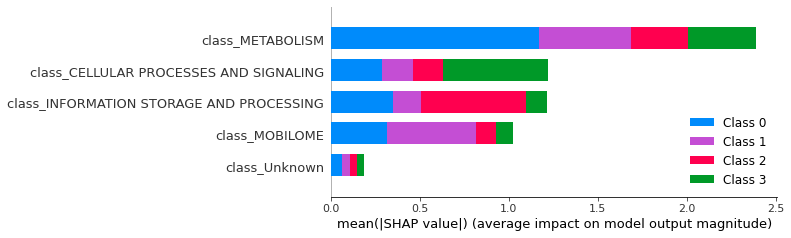

In [113]:
shap.summary_plot(shap_values, df_x)

### Making a prediction

In [128]:
df_pred = pd.read_csv('./0673predict.csv')

In [129]:
for col in df_pred.columns:
    if 'class' not in col:
        df_pred.pop(col)

In [133]:
COG0673_class = final_mod.predict(df_pred)

In [140]:
print(COG0673_class)

[[0]]
